In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

# read and import tje datasets with panddas
ace_df = pd.read_csv("C:/Users/USER/OneDrive - hull.ac.uk/DAIM Lab Workshops/Mentorship Task 1/Data Sets/Ace Superstore Retail Dataset(in).csv", encoding = 'latin1')
store_df = pd.read_csv("C:/Users/USER/OneDrive - hull.ac.uk/DAIM Lab Workshops/Mentorship Task 1/Data Sets/Store Locations(Store Locations).csv")


print(ace_df)
#print(store_df)

         Order ID  Order Date Order Mode Customer ID       City Postal Code  \
0      BTC-245712   6/22/2024     Online    LO028977     Norton          S8   
1      NZR-891212   3/15/2024   In-Store    OH046670   West End        DN36   
2      TDN-811093   2/29/2024     Online    FH015492    Newtown        RG20   
3      MIX-746378  10/25/2024   In-Store    ZZ015342   East End        BH21   
4      UGI-201465   8/18/2024     Online    TV075977     Seaton        LE15   
...           ...         ...        ...         ...        ...         ...   
10995  DSZ-011268    5/7/2024   In-Store    WF009587     Milton        NG22   
10996  CGM-940703    1/8/2023     Online    BP009480     London        EC1V   
10997  HRH-890460   3/22/2023   In-Store    ME002547  Normanton        LE15   
10998  IFZ-697340   9/27/2024     Online    JQ001839     Seaton        LE15   
10999  LPN-893872   1/20/2023   In-Store    DB076382     Sutton        CT15   

       Country           Region                  Pr

In [2]:
#Checking for null values
ace_df.isnull().sum()




Order ID           0
Order Date         0
Order Mode         0
Customer ID        0
City               0
Postal Code        0
Country          220
Region          2811
Product ID         0
Product Name       0
Category         198
Sub-Category       0
Sales              0
Cost Price         0
Quantity           0
Discount         973
dtype: int64

In [3]:
# to find duplicate values
ace_df.duplicated().sum()

np.int64(0)

In [4]:
# Mapping postal code to region Dictionary

In [5]:
#Checking the cities under city Column

ace_df['City'].value_counts()

City
London        925
Norton        319
Sutton        305
Liverpool     302
Birmingham    300
             ... 
Burnside      130
Normanton     129
Whitwell      129
Aberdeen      128
Whitchurch    120
Name: count, Length: 61, dtype: int64

In [6]:
# Checking the postcodes under Postal Code column

ace_df['Postal Code'].value_counts()

Postal Code
LE15    295
BD23    290
CV35    279
S8      175
M14     175
       ... 
AB39    128
AB56    123
BS14    120
DN21    120
NG34    118
Name: count, Length: 72, dtype: int64

In [7]:
#Here we are mapping the postcode to the region to automatically fill Region based on the postal code already in the data

postalcode_region_map = ace_df.loc[ace_df['Region'].notnull(), ['Postal Code', 'Region']].drop_duplicates().set_index('Postal Code')['Region'].to_dict()

ace_df['Region'] = ace_df['Region'].fillna(ace_df['Postal Code'].map(postalcode_region_map))

In [8]:
#  Checking to see it was mapped successfully

#ace_df[ace_df['Postal Code'].str.contains('WC1B')]

In [9]:
# here we are maping the City to automatically fill the country based on the city already in the data

country_city_map = ace_df.loc[ace_df['Country'].notnull(), ['City', 'Country']].drop_duplicates().set_index('City')['Country'].to_dict()

ace_df['Country'] = ace_df['Country'].fillna(ace_df['City'].map(country_city_map))

In [10]:
#Here we are mapping category to sub catregories

category_map = ace_df.loc[ace_df['Category'].notnull(), ['Sub-Category', 'Category']].drop_duplicates().set_index('Sub-Category')['Category'].to_dict()

ace_df['Category'] = ace_df['Category'].fillna(ace_df['Sub-Category'].map(category_map))

In [11]:
#Checking and analyzing to see if it mapped successfully

ace_df[ace_df['Order ID'].str.contains('HWI-435693')]

,Order ID,Order Date,Order Mode,Customer ID,City,Postal Code,Country,Region,Product ID,Product Name,Category,Sub-Category,Sales,Cost Price,Quantity,Discount
79,HWI-435693,8/1/2024,In-Store,JQ000431,Whitchurch,BS14,England,East Midlands,01JZ3N55H83PKNR5TH9H69YCE3,Sports Water Bottle with Infuser,Fitness,Hydration Gear,19.99,5.997,19,0.34


In [12]:
ace_df.isnull().sum()

Order ID          0
Order Date        0
Order Mode        0
Customer ID       0
City              0
Postal Code       0
Country           0
Region            0
Product ID        0
Product Name      0
Category         31
Sub-Category      0
Sales             0
Cost Price        0
Quantity          0
Discount        973
dtype: int64

In [13]:
# to fill the discount column we first calculate unit sales price for all rows

ace_df['sales_price'] = ace_df['Sales'] / ace_df['Quantity']

# we can estimate original price from rows where discount is known

discount_known = ace_df[ace_df['Discount'].notnull()].copy()
discount_known['Original_price'] = discount_known['sales_price'] / (1 - discount_known['Discount'])

#Estimate average markup like oriiginal_price / cost_price

discount_known['markup'] = discount_known['Original_price'] / discount_known['Cost Price']
average_markup = discount_known['markup'].mean()

#For rows with missing discount we estimate original price

missing_discount = ace_df['Discount'].isnull()
valid_missing = (
    missing_discount & 
    ace_df['Cost Price'].notnull() &
    ace_df['Sales'].notnull() &
    ace_df['Quantity'].notnull()
)
ace_df.loc[missing_discount, 'Original_price'] = ace_df.loc[missing_discount, 'Cost Price'] * average_markup 

# now the original price we estimated lets calculate the discount

ace_df.loc[missing_discount, 'Discount'] = 1 - (ace_df.loc[missing_discount, 'sales_price'] / ace_df.loc[missing_discount, 'Original_price'])

#dropping created columns

ace_df.drop(columns=['sales_price', 'Original_price'], inplace=True)

In [14]:
ace_df

,Order ID,Order Date,Order Mode,Customer ID,City,Postal Code,Country,Region,Product ID,Product Name,Category,Sub-Category,Sales,Cost Price,Quantity,Discount
0,BTC-245712,6/22/2024,Online,LO028977,Norton,S8,England,East Midlands,01JZ3N512GHNAJSF3HCCQ0PQYY,Flavored Popcorn Mix,Food - Snacks,Gourmet Snacks,2.99,0.897,4,0.240000
1,NZR-891212,3/15/2024,In-Store,OH046670,West End,DN36,England,East of England,01JZ3N56DDVK7Y600QGH2M6T1X,Olive Oil,Food - Condiments,Cooking Oils,7.99,2.397,16,0.320000
2,TDN-811093,2/29/2024,Online,FH015492,Newtown,RG20,England,East Midlands,01JZ3N53A64TW72TVK28SMMXKX,Children's Backpack,Accessories,Kids' Bags,29.99,8.997,2,0.090000
3,MIX-746378,10/25/2024,In-Store,ZZ015342,East End,BH21,England,North West,01JZ3N572S4RVA29Y33YRWH174,Honey Butter Popcorn,Food - Snacks,Gourmet Snacks,2.99,0.897,4,0.010000
4,UGI-201465,8/18/2024,Online,TV075977,Seaton,LE15,England,East Midlands,01JZ3N52RT7CJNB27BFS6H8BF7,Sliced Cucumbers,Food - Produce,Fresh Cut Vegetables,1.29,0.387,11,0.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,DSZ-011268,5/7/2024,In-Store,WF009587,Milton,NG22,England,East of England,01JZ3N5AW1CPFPMWWT33J6AGMW,Cheddar Cheese Crackers,Food - Snacks,Savory Snacks,2.29,0.687,4,0.140000
10996,CGM-940703,1/8/2023,Online,BP009480,London,EC1V,England,London,01JZ3NC7B86JEQRHTJTFX0FSGK,Reusable Produce Bags Set,Kitchen,Eco-Friendly Kitchen Products,14.99,4.497,7,0.170000
10997,HRH-890460,3/22/2023,In-Store,ME002547,Normanton,LE15,England,North West,01JZ3N5989NSCYRYH9AT9BA983,Fitness Resistance Bands Set,Fitness,Strength Training Equipment,34.99,10.497,8,0.110000
10998,IFZ-697340,9/27/2024,Online,JQ001839,Seaton,LE15,England,South West,01JZ3NC5FBR8J1HDZXW4XW5RH7,Smartphone Tripod,Photography,Tripods & Accessories,29.99,8.997,19,0.380000


In [15]:
# testing to see if we have the same discount with what the dataset provided


test_df = ace_df[ace_df['Discount'].notnull() & ace_df['Cost Price'].notnull()].copy()

test_df['sales_price'] = test_df['Sales'] / test_df['Quantity']

test_df['Original_price'] = test_df['sales_price'] / (1- test_df['Discount'])

test_df['discount_check'] = 1 -(test_df['sales_price'] / test_df['Original_price'])

test_df['exact_match'] = (test_df['Discount'].round(2) == test_df['discount_check']).round(2)

print(test_df[test_df['exact_match'] == False][['Sales', 'Quantity', 'Cost Price', 'Discount', 'discount_check']])

       Sales  Quantity  Cost Price  Discount  discount_check
1       7.99        16       2.397  0.320000        0.320000
2      29.99         2       8.997  0.090000        0.090000
3       2.99         4       0.897  0.010000        0.010000
4       1.29        11       0.387  0.340000        0.340000
6       3.99        11       1.197  0.210000        0.210000
...      ...       ...         ...       ...             ...
10993   1.89        18       0.567  0.050000        0.050000
10995   2.29         4       0.687  0.140000        0.140000
10996  14.99         7       4.497  0.170000        0.170000
10997  34.99         8      10.497  0.110000        0.110000
10999   6.99        13       2.097  0.647818        0.647818

[8373 rows x 5 columns]


In [16]:
ace_df.isnull().sum()

Order ID         0
Order Date       0
Order Mode       0
Customer ID      0
City             0
Postal Code      0
Country          0
Region           0
Product ID       0
Product Name     0
Category        31
Sub-Category     0
Sales            0
Cost Price       0
Quantity         0
Discount         0
dtype: int64

In [17]:
#ace_df

In [18]:
# some categories are not still mapped

subcat_to_cat = {}
subcat_to_cat['Seasoning Mixes'] = 'Food - Spices'
subcat_to_cat['Dog Supplies'] = 'Pet Products'
subcat_to_cat['Audio Recording Devices'] = 'Electronics'
subcat_to_cat['Seeds & Nuts'] = 'Food - Snacks'
subcat_to_cat['Healthy Meals'] = 'Food - Meals'

for i, row in ace_df.iterrows():
    if pd.isnull(row['Category']):
        subcat = row['Sub-Category']
        if pd.notnull(subcat) and subcat in subcat_to_cat:
            ace_df.at[i, 'Category'] = subcat_to_cat[subcat]#and pd.notnull(row['Sub-Category']):
                 

# go through each row and fill in the missing category using Sub-Category

#for i, row in ace_df.iterrows():
    #if pd.isnull(row['Category']):
       # subcat = row['Sub-Category']
      #  if pd.notnull(subcat) and subcat in subcat_to_cat:
     #       ace_df[i, 'Category'] = subcat_to_cat[subcat]
print("Still Missing Values: ",ace_df['Category'].isnull().sum())

Still Missing Values:  0


In [19]:
ace_df.isnull().sum()

Order ID        0
Order Date      0
Order Mode      0
Customer ID     0
City            0
Postal Code     0
Country         0
Region          0
Product ID      0
Product Name    0
Category        0
Sub-Category    0
Sales           0
Cost Price      0
Quantity        0
Discount        0
dtype: int64

In [20]:
print(ace_df.columns.tolist())

['Order ID', 'Order Date', 'Order Mode', 'Customer ID', 'City', 'Postal Code', 'Country', 'Region', 'Product ID', 'Product Name', 'Category', 'Sub-Category', 'Sales', 'Cost Price', 'Quantity', 'Discount']


In [21]:
# Checking for duplicates in the data

duplicates_mask = ace_df.duplicated()

In [22]:
num_duplicates = duplicates_mask.sum()
print(f"Found {num_duplicates} duplicate rows")

Found 0 duplicate rows


In [23]:
# checking for Anomalies in the data like negtive sales, discount outside 0-1 range zero or negative quantity or CP

neg_sales = ace_df[ace_df['Sales']<0]
print(f"Rows with negative sales: {len(neg_sales)}")
print(neg_sales)

Rows with negative sales: 2
        Order ID Order Date Order Mode Customer ID     City Postal Code  \
6231  TOZ-436225  12/7/2023   In-Store    WA005888  Newport        NR29   
7205  NFY-445394  8/22/2023   In-Store    OV004753   Ashley        SN13   

      Country           Region                  Product ID  Product Name  \
6231  England  East of England  01JZ3NT0WSFFNM9T43915SGN1R  Fresh Lemons   
7205  England  East of England  01JZ3N581SQ22MAK39E2KMEZDT      Zucchini   

                  Category Sub-Category  Sales  Cost Price  Quantity  Discount  
6231  Food - Fresh Produce       Fruits  -0.10      -0.200        13      0.38  
7205        Food - Produce   Vegetables  -0.06      -0.263         7      0.36  


In [24]:
anomalies_discount = ace_df[(ace_df['Discount'] < 0) | (ace_df['Discount'] > 1)]

print(f" Rows with Anomalis Discount:{len(anomalies_discount)}")
anomalies_discount

 Rows with Anomalis Discount:197


,Order ID,Order Date,Order Mode,Customer ID,City,Postal Code,Country,Region,Product ID,Product Name,Category,Sub-Category,Sales,Cost Price,Quantity,Discount
183,YWV-893212,9/9/2024,In-Store,AW056186,Weston,GU32,England,South East,01JZ3N55Y4FVCVP8CAXFFPKY0F,Foot Spa Bath Massager,Health,Personal Care & Grooming,59.99,17.997,4,-0.144590
204,VCA-613402,1/9/2024,Online,NS069640,Thorpe,BD23,England,East of England,01JZ3N5618YV1KAK7R07ZPTJ6Y,Kid's Fruit Snacks,Food - Snacks,Sweet Snacks,2.49,0.747,4,-0.144590
322,RAA-859987,8/3/2024,Online,RU014698,Stapleford,LN6,England,East Midlands,01JZ3N563QYFEB8QYHSTCNWH9H,Diced Tomatoes (canned),Food - Canned Goods,Canned Vegetables,1.49,0.447,2,-1.289181
363,DGS-988971,2/17/2024,In-Store,AH043184,Edinburgh,EH9,Scotland,North West,01JZ3N55P5TN4P8G8MJ6AHQ8JQ,Multi-Port USB Hub,Electronics,Computer Accessories,19.99,5.997,4,-0.144590
383,LUC-513135,9/5/2024,In-Store,ZU048884,Newport,NR29,England,London,01JZ3N51A0QB4P255ZQ396VH6P,Frozen Burritos,Food - Frozen Foods,Frozen Entrees,8.99,2.697,2,-1.289181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10804,FIZ-485718,6/17/2024,Online,QI072534,Eaton,DN22,England,East of England,01JZ3NC3ZXG9X04XBFMA87QHDF,Gluten-Free Brownies,Food - Baking,Gluten-Free Desserts,4.99,1.497,2,-1.289181
10836,VHN-741703,7/12/2024,Online,JW035277,Tullich,AB55,Scotland,East of England,01JZ3NC49Q02P356T5ZY9EEJ50,Blackberry Compote,Food - Condiments,Fruit Spreads,5.29,1.587,4,-0.144590
10871,IYN-729377,10/20/2023,In-Store,HS079253,Church End,CB4,England,West Midlands,01JZ3NC7MJVERD3MQKGTZXXZ0M,Teriyaki Tofu Stir-Fry,Food - Prepared Meals,Vegetarian Meals,7.49,2.247,1,-3.578362
10901,JUR-208879,10/18/2023,In-Store,YR020187,Ashley,SN13,England,North West,01JZ3N59HWZH3BN0Q0AEGHD49W,Portable UV Sterilizer,Health,Health Devices,19.99,5.997,4,-0.144590


In [25]:
invalid_qty = ace_df[ace_df['Quantity']<=0]
invalid_cost = ace_df[ace_df['Cost Price']<= 0]
print (f" Rows with Invalid Qty: {len(invalid_qty)}")
print(f" Rows with Invalid Cost: {len(invalid_cost)}")


 Rows with Invalid Qty: 0
 Rows with Invalid Cost: 42


In [26]:
invalid_discounts = ace_df[ace_df['Discount']>1]
print(invalid_discounts[['Sales', 'Quantity', 'Cost Price', 'Discount']].head())

      Sales  Quantity  Cost Price  Discount
6115   0.14         9      -0.203   1.10525


In [27]:
negative_sales = ace_df[ace_df['Sales']<0]
invalid_cost = ace_df[ace_df['Cost Price']<=0]

In [28]:

# This function handles both "Category-Segment and stand-alone Category values"

def extract_segment(Category):
    if '-' in Category:
        return Category.split('-')[1].strip()
    else:
        return Category.strip()

# now we create a new 'Segment ' column

ace_df['Segment'] = ace_df['Category'].apply(extract_segment)

In [29]:
# Group by Region, Category etc

summary_df = ace_df.groupby(['Region', 'Category', 'Segment']).agg({
    'Sales': 'sum',
    'Discount': 'mean',
    'Quantity': 'sum'
}).reset_index()   

In [30]:
print(summary_df.head(10))

          Region      Category       Segment   Sales  Discount  Quantity
0  East Midlands   Accessories   Accessories  731.64  0.215684       243
1  East Midlands          Apps          Apps   25.99  0.120000        11
2  East Midlands  Art Supplies  Art Supplies  181.36  0.387211        66
3  East Midlands         Audio         Audio  514.89  0.160000       106
4  East Midlands    Automotive    Automotive  194.47  0.137143        67
5  East Midlands          Baby          Baby   78.99  0.000000        13
6  East Midlands        Beauty        Beauty  471.20  0.235763        81
7  East Midlands      Bicycles      Bicycles  960.54  0.246667        13
8  East Midlands         Books         Books  137.10  0.236000        40
9  East Midlands      Clothing      Clothing  234.26  0.135000        46


In [31]:
# Next is to identify top 5 best selling Products
# Here we group by the product name to get total sales and quantity

product_sales = ace_df.groupby('Product Name').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean' # average discount
}).reset_index()

#Top 5 best-selling by Sales

top_5_products = product_sales.sort_values('Sales', ascending=False).head(5)

# Underperforming products by lowest sales(revenue)
bottom_5_products = product_sales.sort_values('Sales', ascending=True).head(5)

#Optionally, find products with the highest average discount
#high_discount_products = product_sales.sort_values('Discount', ascending=False).head(5)

print("Top 5 Best_Selling:\n", top_5_products)
print("\nBottom 5 Underperforming Products:\n", bottom_5_products)


Top 5 Best_Selling:
                        Product Name    Sales  Quantity  Discount
1200  Portable Refrigerator Freezer  4504.38       171  0.150000
484                   Electric Bike  4499.25        53  0.214000
1204       Portable Solar Generator  3998.20       128  0.206129
443                  Digital Camera  3902.86       107  0.086923
363          Compact Digital Camera  2998.17       133  0.135000

Bottom 5 Underperforming Products:
              Product Name  Sales  Quantity  Discount
188    Canned Black Beans   1.29         7  0.270000
563   Flavored Rice Cakes   1.49        12  0.080000
1554         Tomato Paste   1.87        29  0.136667
1335         Sesame Seeds   1.99        20  0.330000
87            Baking Soda   2.13        23  0.140000


In [32]:
#Calculating margin for each row

ace_df['Margin'] = ace_df['Sales'] - (ace_df['Cost Price'] * ace_df['Quantity'])

category_margin = ace_df.groupby('Category').agg(
    Total_Margin = ('Margin', 'sum'),
    Average_Margin =('Margin', 'mean'),
    Total_Sales = ('Sales', 'sum')
).reset_index()

category_margin = category_margin.sort_values(by='Total_Margin', ascending=False)

print(category_margin)

                  Category  Total_Margin  Average_Margin  Total_Sales
58         Food - Dressing        -3.571       -1.190333         7.17
97   Food - Salad Toppings       -15.064       -3.766000         9.96
81            Food - Meals       -17.456      -17.456000         4.99
96          Food - Protein       -18.464       -4.616000        17.71
106         Food - Spreads       -21.396       -5.349000        17.26
..                     ...           ...             ...          ...
31                 Fitness    -36146.704     -101.821701     14048.88
116                   Home    -51622.725      -88.093387     21512.51
30             Electronics    -52965.980     -211.863920     22268.58
120                Kitchen    -85940.416      -93.109876     36046.21
123                Outdoor    -87798.229     -167.874243     35187.50

[135 rows x 4 columns]


In [33]:
#Group by ORder mode and sum sales

sales_by_mode = ace_df.groupby('Order Mode')['Sales'].sum().reset_index()

#calculate percentage contribution for each mode

total_sales = sales_by_mode['Sales'].sum()
sales_by_mode['Percentage'] = (sales_by_mode['Sales'] / total_sales) * 100

print(sales_by_mode)

  Order Mode      Sales  Percentage
0   In-Store  145746.63   48.367145
1     Online  155587.32   51.632855


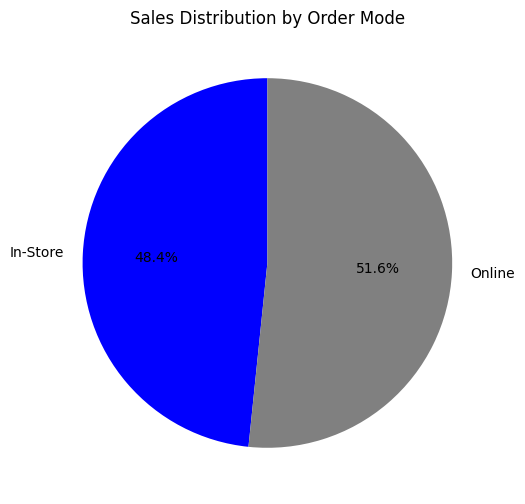

In [36]:
# let's visualize

import matplotlib.pyplot as plt

#Using pie chart to show distribution of sales

plt.figure(figsize=(6,6))
plt.pie(
    sales_by_mode['Sales'],
    labels=sales_by_mode['Order Mode'],
    autopct= '%1.1f%%',
    startangle=90,
    colors=['blue', 'grey']
)
plt.title('Sales Distribution by Order Mode')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_15592\3897309036.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Category', bbox_to_anchor=(1.05,1), loc='upper left')


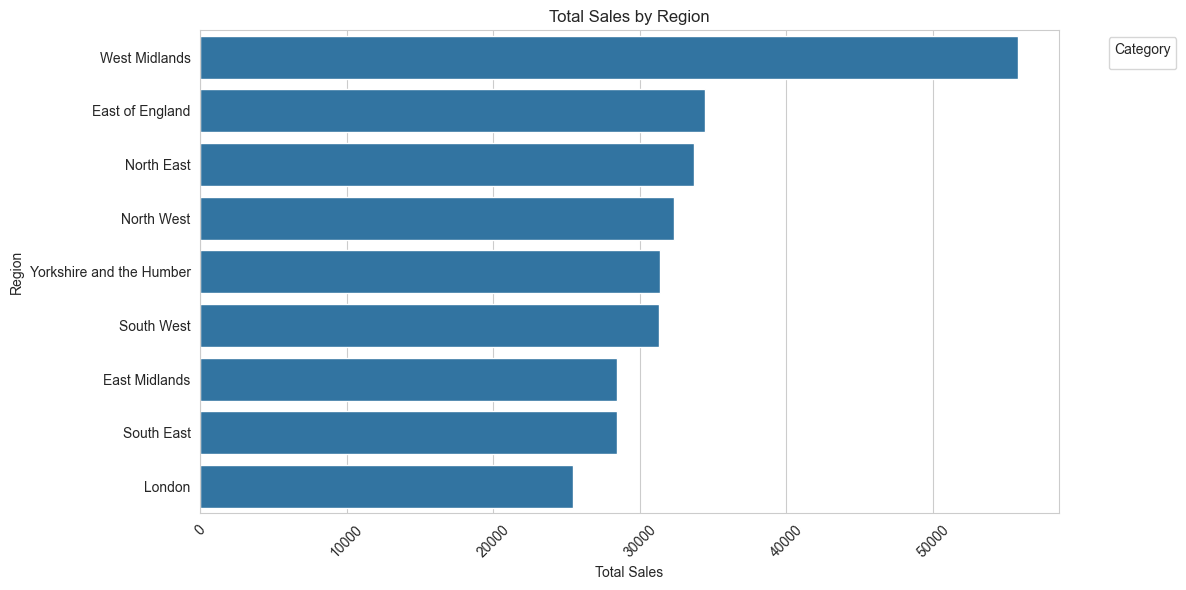

In [74]:
import seaborn as sns

# Setting a consistent style for charts

sns.set_style('whitegrid')

#...........-------Chart 1: Sales by Region and Segment ---

# Group by Region and Segment, sum sales

region_category_sales = ace_df.groupby(['Region'])['Sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=region_category_sales, x= 'Sales', y='Region')
plt.title('Total Sales by Region')
plt.ylabel('Region')
plt.xlabel('Total Sales')
plt.legend(title='Category', bbox_to_anchor=(1.05,1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_15592\2636815276.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_products, x="Sales", y="Product Name", palette="crest")


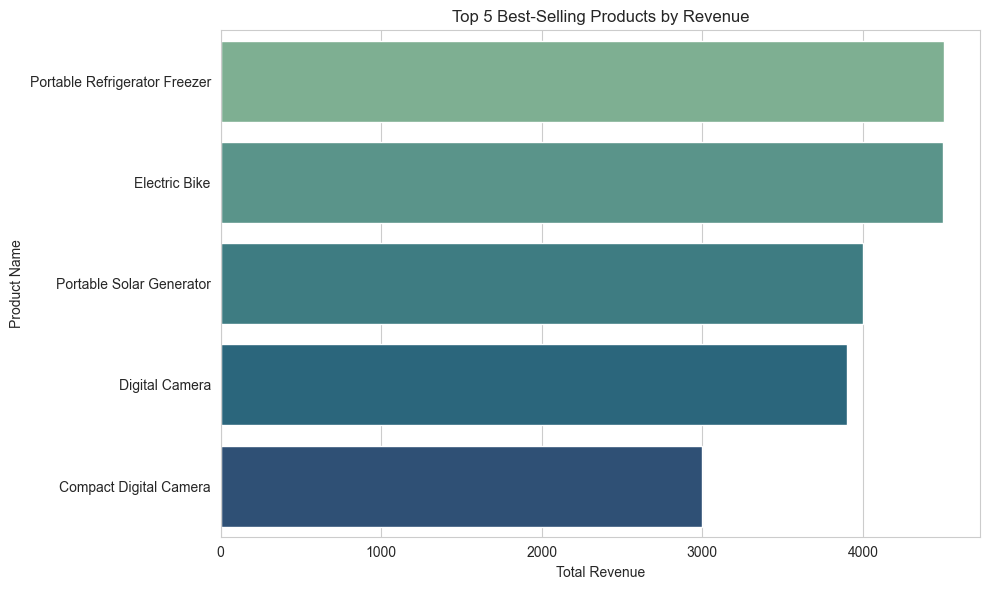

In [56]:
top_5_products = ace_df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_5_products, x="Sales", y="Product Name", palette="crest")
plt.title("Top 5 Best-Selling Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_15592\914032386.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_5_products, x="Sales", y="Product Name", palette="flare")


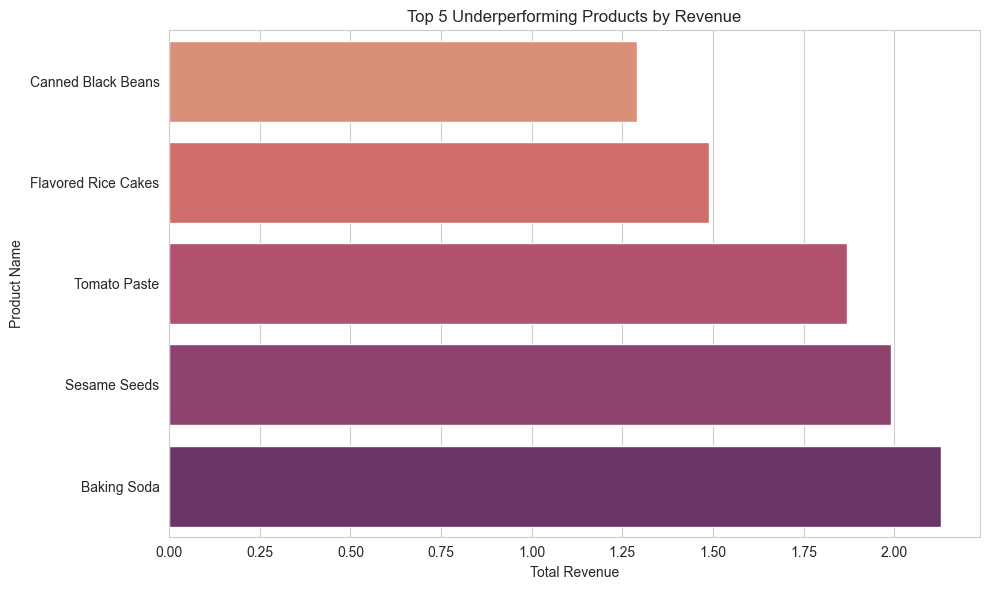

In [59]:
bottom_5_products = ace_df.groupby("Product Name")["Sales"].sum().sort_values().head(5).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=bottom_5_products, x="Sales", y="Product Name", palette="flare")
plt.title("Top 5 Underperforming Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

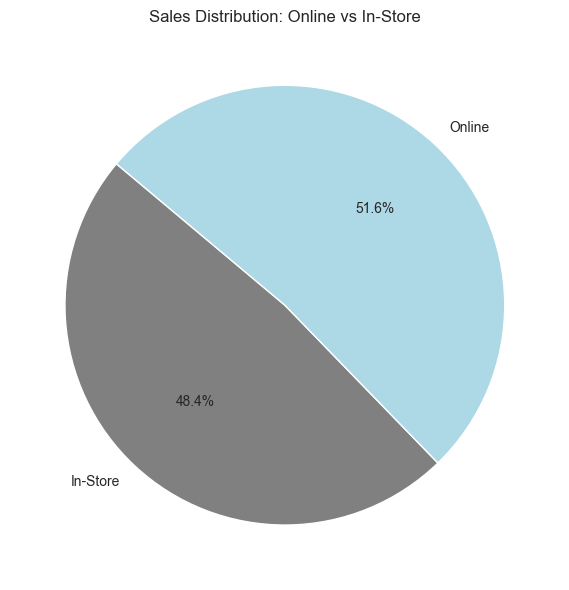

In [66]:
# ----Sales Distribution by ORder Mode

order_mode_sales = ace_df.groupby('Order Mode')['Sales'].sum()

plt.figure(figsize=(6,6))
order_mode_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=["Grey", "lightBlue"])
plt.title("Sales Distribution: Online vs In-Store")
plt.ylabel("")
plt.tight_layout()
plt.show()